In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import torchvision.transforms.functional as TF
parent = os.path.dirname(os.getcwd())
data = parent + "/Data/Cifar 10/"
data

'/Users/michalmalyska/Desktop/Extracurriculars/Fields Presentation/Names-and-Nonsense/Data/Cifar 10/'

# Data Import and Transform

In [23]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=data,
                                        train=True,
                                        download=False, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=False, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

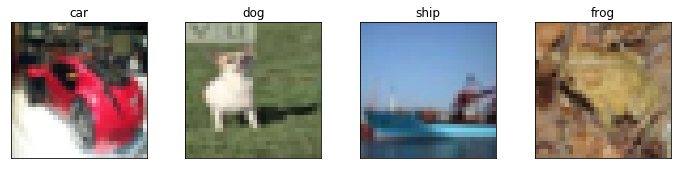

In [24]:
def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [40]:
model_directory_path = os.getcwd()
model_path = model_directory_path + '/cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(3):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

[1,  2000] loss: 1.228
[1,  4000] loss: 1.236
[1,  6000] loss: 1.244
[1,  8000] loss: 1.220
[1, 10000] loss: 1.214
[1, 12000] loss: 1.248
[2,  2000] loss: 1.225
[2,  4000] loss: 1.238
[2,  6000] loss: 1.236
[2,  8000] loss: 1.240
[2, 10000] loss: 1.227
[2, 12000] loss: 1.235
[3,  2000] loss: 1.231
[3,  4000] loss: 1.247
[3,  6000] loss: 1.225
[3,  8000] loss: 1.238
[3, 10000] loss: 1.239
[3, 12000] loss: 1.223
Finished Training.
Saved model parameters to disk.


tensor([[[ 0.2392,  0.2471,  0.2941,  ...,  0.0745, -0.0118, -0.0902],
         [ 0.1922,  0.1843,  0.2471,  ...,  0.0667, -0.0196, -0.0667],
         [ 0.1843,  0.1843,  0.2392,  ...,  0.0902,  0.0196, -0.0588],
         ...,
         [-0.4667, -0.6706, -0.7569,  ..., -0.7020, -0.8980, -0.6863],
         [-0.5216, -0.6157, -0.7255,  ..., -0.7961, -0.7725, -0.8431],
         [-0.5765, -0.5608, -0.6471,  ..., -0.8118, -0.7333, -0.8353]],

        [[-0.1216, -0.1294, -0.0902,  ..., -0.2549, -0.2863, -0.3333],
         [-0.1216, -0.1373, -0.1059,  ..., -0.2549, -0.2863, -0.3098],
         [-0.1373, -0.1451, -0.1294,  ..., -0.2314, -0.2549, -0.3020],
         ...,
         [-0.0275, -0.2157, -0.3098,  ..., -0.2392, -0.4980, -0.3333],
         [-0.0902, -0.2000, -0.3333,  ..., -0.3569, -0.3569, -0.4980],
         [-0.1608, -0.1765, -0.3020,  ..., -0.3961, -0.3412, -0.4745]],

        [[-0.6157, -0.6314, -0.6000,  ..., -0.7176, -0.7176, -0.7412],
         [-0.6000, -0.6863, -0.6471,  ..., -0

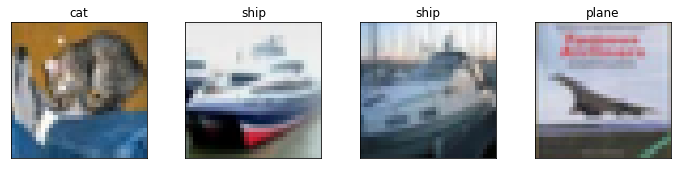

In [52]:
dataiter = iter(testloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

print(images[0])
outputs = net(images)
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

In [100]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))


Model accuracy on 10000 test images: 54.56%


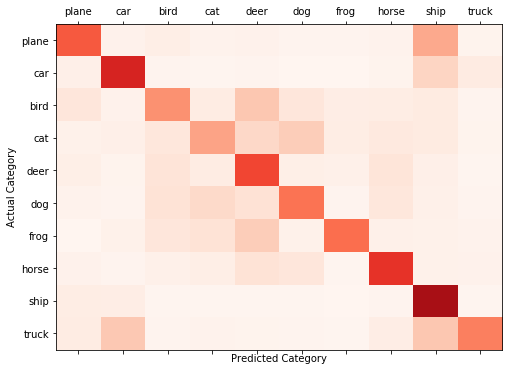

In [102]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Reds'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

# Predict Logos

In [113]:
new_logos = parent + "/Data/logos"
new_logos

def alpha_to_color(image, color=(255, 255, 255)):
    """Set all fully transparent pixels of an RGBA image to the specified color.
    This is a very simple solution that might leave over some ugly edges, due
    to semi-transparent areas. You should use alpha_composite_with color instead.

    Source: http://stackoverflow.com/a/9166671/284318

    Keyword Arguments:
    image -- PIL RGBA Image object
    color -- Tuple r, g, b (default 255, 255, 255)

    """ 
    x = np.array(image)
    r, g, b, a = np.rollaxis(x, axis=-1)
    r[a == 0] = color[0]
    g[a == 0] = color[1]
    b[a == 0] = color[2] 
    x = np.dstack([r, g, b])
    return Image.fromarray(x, 'RGB')

def predict_from_png(path):
    
    image = Image.open(new_logos + path)
    #print(image)
    image = alpha_to_color(image)
    #print(image)
    x = TF.to_tensor(image)
    #print(x.shape)
    x.unsqueeze_(0)
    #print(x.shape)
    output = net(x)
    probabilities = sm(output)
    _, predicted = torch.max(output.data, 1)
    return predicted[0], probabilities[0]

# airplane : 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9

print(predict_from_png("/dodge.png"))
print(predict_from_png("/linkedin.png"))
print(predict_from_png("/pepsi.png"))
print(predict_from_png("/Michal.png"))
print(predict_from_png("/Shawn.png"))
print(predict_from_png("/Alin.png"))
print(predict_from_png("/David.png"))


(tensor(8), tensor([0.2542, 0.0107, 0.0677, 0.1544, 0.0269, 0.0642, 0.0339, 0.0139, 0.3612,
        0.0129], grad_fn=<SelectBackward>))
(tensor(0), tensor([0.4596, 0.0025, 0.0208, 0.0300, 0.0098, 0.0246, 0.0019, 0.0066, 0.4413,
        0.0030], grad_fn=<SelectBackward>))
(tensor(0), tensor([0.3951, 0.0827, 0.1331, 0.0779, 0.0164, 0.0275, 0.0129, 0.0307, 0.1652,
        0.0586], grad_fn=<SelectBackward>))
(tensor(8), tensor([0.1667, 0.0291, 0.1031, 0.1281, 0.0558, 0.0715, 0.0434, 0.0304, 0.3406,
        0.0313], grad_fn=<SelectBackward>))
(tensor(5), tensor([0.0597, 0.0017, 0.1684, 0.1645, 0.0577, 0.3066, 0.0155, 0.1503, 0.0651,
        0.0105], grad_fn=<SelectBackward>))
(tensor(3), tensor([0.0302, 0.0216, 0.0842, 0.3404, 0.0206, 0.3148, 0.0441, 0.0570, 0.0687,
        0.0186], grad_fn=<SelectBackward>))
(tensor(3), tensor([0.1123, 0.0092, 0.1643, 0.2232, 0.0739, 0.1940, 0.0538, 0.0429, 0.1105,
        0.0161], grad_fn=<SelectBackward>))
